In [223]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


C:\Users\X9249367\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'rate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [224]:
df = pd.read_csv("Clean/reports21data.csv",sep = ";",decimal = ".",encoding = "latin-1")

In [229]:
df.columns

Index(['DATE', 'TIME', 'LEFT CURRENT [A]', 'LEFT POWER [W]',
       'LEFT RESISTANCE [Ohm]', 'LEFT VOLTAGE [V]', 'RIGHT CURRENT [A]',
       'RIGHT POWER [W]', 'RIGHTRESISTANCE [Ohm]', 'RIGHT VOLTAGE [V]',
       'WIRE FUNCTIONAL', 'CYCLE TIME[Sn]'],
      dtype='object')

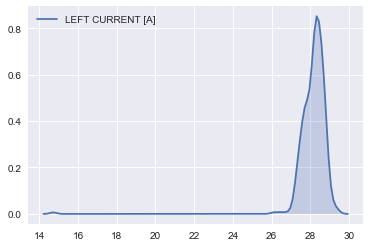

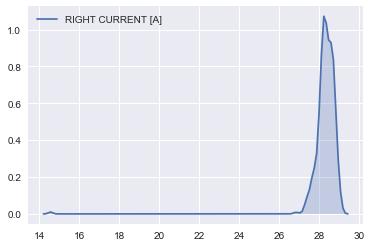

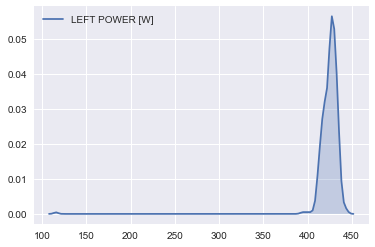

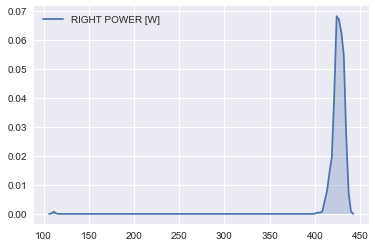

In [230]:
def pt(i):
    fig, axes = plt.subplots()  
    sns.kdeplot(i,shade=True)                      
    plt.show()
name_list=['LEFT CURRENT [A]', 'RIGHT CURRENT [A]','LEFT POWER [W]','RIGHT POWER [W]']
for i in name_list:
    x = df[i]
    pt(x)

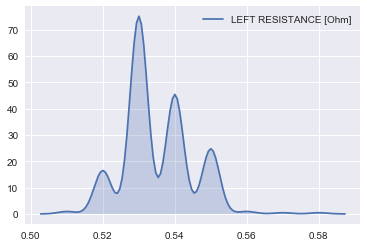

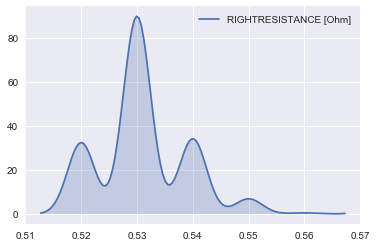

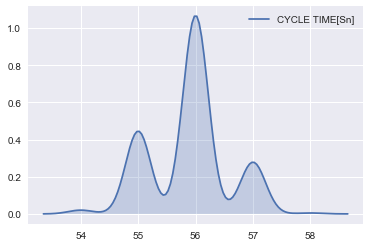

In [231]:
name_list2=['LEFT RESISTANCE [Ohm]','RIGHTRESISTANCE [Ohm]', 'CYCLE TIME[Sn]']
for i in name_list2:
    x = df[i]
    pt(x)

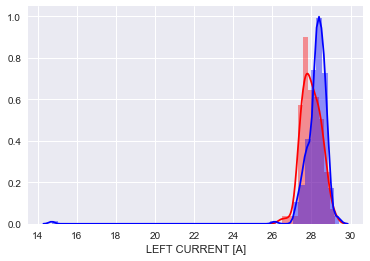

In [232]:
fig, axes = plt.subplots(1,1)  
sns.distplot(df['LEFT CURRENT [A]'][df['WIRE FUNCTIONAL']=='DEFECT'],color='r')
sns.distplot(df['LEFT CURRENT [A]'][df['WIRE FUNCTIONAL']=='OK'],color='b')                   
plt.show()  

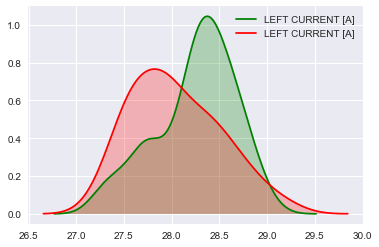

In [233]:
data1=df[(df['LEFT CURRENT [A]']>27)&(df['LEFT CURRENT [A]']<30)&(df['WIRE FUNCTIONAL']=='OK')&(df['CYCLE TIME[Sn]']==56)]
data2=df[(df['LEFT CURRENT [A]']>27)&(df['LEFT CURRENT [A]']<30)&(df['WIRE FUNCTIONAL']=='DEFECT')&(df['CYCLE TIME[Sn]']==56)]
ax1=sns.kdeplot(data1['LEFT CURRENT [A]'],color='G',shade=True)
ax2=sns.kdeplot(data2['LEFT CURRENT [A]'],color='r',shade=True) 

In [234]:
df = pd.read_csv("Clean/reports21data.csv",sep = ";",decimal = ".",encoding = "latin-1")
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
def cal(var,mi,ma):
    #data_test=df[(df['LEFT CURRENT [A]']>mi)&(df['LEFT CURRENT [A]']<ma)&(df['CYCLE TIME[Sn]']==56)]
    data_test=df[(df[var]>mi)&(df[var]<ma)]
    OK=data_test[(data_test['WIRE FUNCTIONAL']=='OK')]
    NOK=data_test[(data_test['WIRE FUNCTIONAL']=='DEFECT')]
    if NOK.size!=0:
        res=OK.size/NOK.size
    else:
        res=0
    return res
def range_choose(var,t1,t2,step):
    temp=0
    temp_i=0
    temp_j=0
    for i in my_range(t1,t2,step):
        for j in my_range(i,t2,step):
            t=cal(var,i,j)
            if t>temp:
                temp=t
                temp_i=i
                temp_j=j
    return temp,temp_i,temp_j
#range_choose(28,29)

In [235]:
name_list=['LEFT CURRENT [A]', 'RIGHT CURRENT [A]']
for i in name_list:
    print(i)
    print("Best Ratio between OK/NonOK:%.1f; min:%.1f; max:%.1f"%range_choose(i,27,29,0.1))

LEFT CURRENT [A]
Best Ratio:8.3; min:28.1; max:28.2
RIGHT CURRENT [A]
Best Ratio:8.3; min:28.6; max:28.7


In [236]:
name_list=['LEFT POWER [W]','RIGHT POWER [W]']
for i in name_list:
    print(i)
    print("Best Ratio between OK/NonOK:%.1f; min:%d; max:%d"%range_choose(i,400,450,1))

LEFT POWER [W]
Best Ratio:19.0; min:425; max:426
RIGHT POWER [W]
Best Ratio:9.5; min:431; max:432


In [237]:
name_list=['LEFT RESISTANCE [Ohm]','RIGHTRESISTANCE [Ohm]']
for i in name_list:
    print(i)
    print("Best Ratio between OK/NonOK:%.1f; min:%.1f; max:%.1f"%range_choose(i,0.51,0.56,0.001))

LEFT RESISTANCE [Ohm]
Best Ratio:4.5; min:0.5; max:0.5
RIGHTRESISTANCE [Ohm]
Best Ratio:3.4; min:0.5; max:0.5


In [238]:
name_list=['CYCLE TIME[Sn]']
for i in name_list:
    print(i)
    print("Best Ratio between OK/NonOK:%.1f; min:%.1f; max:%.1f"%range_choose(i,54,58,0.1))

CYCLE TIME[Sn]
Best Ratio:5.3; min:54.0; max:55.0
